In [1]:
from skyfield.api import N, W, wgs84, load


In [3]:
def sun_location(observer_location, query_time=None, zone_name='Asia/Shanghai', eph=eph):
    assert type(query_time) is datetime.datetime or query_time is None, "time should be datetime.datetime"
    assert type(observer_location) is skyfield.toposlib.GeographicPosition
    zone = timezone(zone_name)
    query_time = datetime.datetime.now() if query_time is None else query_time 
    now = zone.localize(datetime.datetime.now())
    ts = load.timescale()
    t0 = ts.from_datetime(now)
    astrometric = eph['earth'].at(t0).observe(eph['jupiter barycenter'])
    print(astrometric.position)

In [2]:
eph = load('de421.bsp')
ts = load.timescale()
t = ts.utc(2003, 8, 29)

In [5]:
earth, moon, mars, sun = eph['earth'], eph['moon'], eph['mars'], eph['sun']

In [4]:
shanghai = wgs84.latlon(31.256 * N, 121.547 * W)

In [11]:
from positions import Stars



In [12]:
stars = Stars(time=t, observer=shanghai)

TypeError: Stars.observe() got an unexpected keyword argument 'observer'

In [7]:
def observe(observer, target, only_azimuth=True):
    pos = (earth + observer).at(t).observe(target).apparent().altaz()
    if only_azimuth:
        return pos[0]
    else:
        return pos

In [31]:
def observe_all(observer, form="rad"):
    all_stars = ['earth', 'moon', 'mars', 'sun', 'mercury', 'venus']
    positions = {}
    for star in all_stars:
        if form=="rad":
            positions[star] = observe(observer=observer, target=eph[star]).radians
        elif form=="degree":
            positions[star] = observe(observer=observer, target=eph[star]).degrees
    return positions

In [21]:
pos = (earth + shanghai).at(t).observe(mars).apparent().altaz()

In [32]:
pos[0].degrees

-37.03372535689956

In [34]:
positions

{'earth': -1.5678216549185413,
 'moon': 0.7722715750748785,
 'mars': -0.6463604417572094,
 'sun': 0.559883050394306,
 'mercury': 0.6828313095364662,
 'venus': 0.6090991164377714}

In [33]:
positions = observe_all(shanghai)

In [11]:
print(eph)

SPICE kernel file 'de421.bsp' has 15 segments
  JD 2414864.50 - JD 2471184.50  (1899-07-28 through 2053-10-08)
      0 -> 1    SOLAR SYSTEM BARYCENTER -> MERCURY BARYCENTER
      0 -> 2    SOLAR SYSTEM BARYCENTER -> VENUS BARYCENTER
      0 -> 3    SOLAR SYSTEM BARYCENTER -> EARTH BARYCENTER
      0 -> 4    SOLAR SYSTEM BARYCENTER -> MARS BARYCENTER
      0 -> 5    SOLAR SYSTEM BARYCENTER -> JUPITER BARYCENTER
      0 -> 6    SOLAR SYSTEM BARYCENTER -> SATURN BARYCENTER
      0 -> 7    SOLAR SYSTEM BARYCENTER -> URANUS BARYCENTER
      0 -> 8    SOLAR SYSTEM BARYCENTER -> NEPTUNE BARYCENTER
      0 -> 9    SOLAR SYSTEM BARYCENTER -> PLUTO BARYCENTER
      0 -> 10   SOLAR SYSTEM BARYCENTER -> SUN
      3 -> 301  EARTH BARYCENTER -> MOON
      3 -> 399  EARTH BARYCENTER -> EARTH
      1 -> 199  MERCURY BARYCENTER -> MERCURY
      2 -> 299  VENUS BARYCENTER -> VENUS
      4 -> 499  MARS BARYCENTER -> MARS


In [12]:
angle


dict_keys(['path', 'filename', 'spk', 'segments', 'codes'])

In [13]:
eph.segments

[<ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 1 MERCURY BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 2 VENUS BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 3 EARTH BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 4 MARS BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 5 JUPITER BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 6 SATURN BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 7 URANUS BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 8 NEPTUNE BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 9 PLUTO BARYCENTER>,
 <ChebyshevPosition 'de421.bsp' segment 0 SOLAR SYSTEM BARYCENTER -> 10 SUN>,
 <ChebyshevPosition 'de421.bsp' segment 3 EARTH BARYCENTER -> 301 MOON>,
 <ChebyshevPosition 'de421.bsp' 

# Plotting

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
positions.values()

dict_values([-1.5678216549185413, 0.7722715750748785, -0.6463604417572094, 0.559883050394306, 0.6828313095364662, 0.6090991164377714])

Text(3.14, 1, 'test')

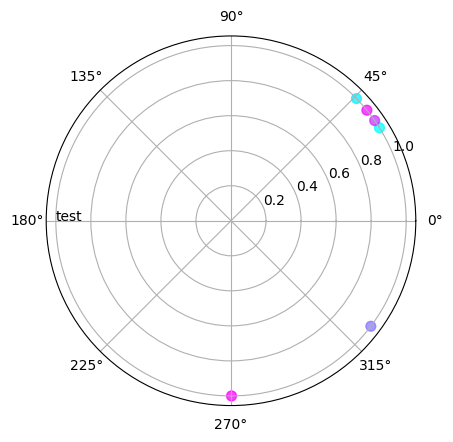

In [67]:
#生成范例数据
r = np.ones(6) #生成100个服从“0~1”均匀分布的随机样本值
# r = np.random.rand(6) 
theta = 2 * np.pi * np.random.rand(6) #生成角度
area = 6 * r**2 # Size of plot
colors = theta #颜色
ax = plt.subplot(projection='polar')
# ax = plt.subplot()

#projection为画图样式，除'polar'外还有'aitoff', 'hammer', 'lambert'等
c = ax.scatter(positions.values(), y=r, c=colors, s=50, cmap='cool', alpha=0.75)
ax.text(3.14,1,"test")
#ax.scatter为绘制散点图函数

In [68]:
from positions import Stars

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

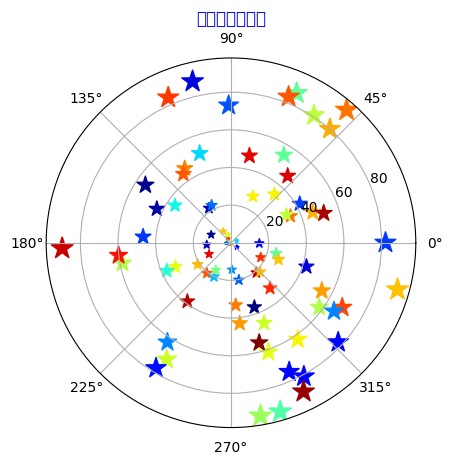

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams["font.sans-serif"] = ["SimHei"]
pi = np.pi
N = 80
theta= 2*pi* np.random.rand(N)
r =  30*pi* np.random.rand(N)
marker_size = 3*r
colors = np.random.rand(N)
ax= plt.subplot(111, polar =True)
ax.scatter(theta, r, s = marker_size, c = colors, cmap ="jet", marker ="*")
ax.set_title("极坐标下散点图",color ='b')
plt.show()